Вариант 3.
Уравнение -$\dfrac{1}{x-3}u''+(1+\dfrac{x}{2})u'-e^{\frac{x}{2}}u=2-x\\$
$u(-1)=u(1)=0\quad \alpha_1=1,\alpha_2=0,\alpha=0,\quad \beta_1=1,\beta_2=0,\beta=0$

In [38]:


import numpy as np
import scipy
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from typing import Callable, List, Tuple, Any, Dict

# Параметры подобраны так, чтобы в МОЕМ!!! VSCode смотрелось хорошо.
plt.rcParams.update(
    {
        "lines.color": "white",
        "patch.edgecolor": "white",
        "text.color": "lightgray",
        "axes.facecolor": "#151515",
        "axes.edgecolor": "#A2A2A2",
        "axes.labelcolor": "white",
        "axes.prop_cycle": plt.cycler('color', ['#00BBF9', '#FEE440', '#00F5D4', '#F15BB5', '#9B5DE5', '#1f77b4', '#ff7f0e', '#2ca02c',
            '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "#A2A2A2",
        "figure.facecolor": "#151515",
        "figure.edgecolor": "#A2A2A2",
        "savefig.facecolor": "#FFFFFF",
        "savefig.edgecolor": "black"
    }
)



In [2]:
def p(x):
    return  1/(x-3)
def q(x):
    return 1+x/2
def r(x):
    return -np.exp(x/2)
def f(x):
    return 2-x

In [3]:
def fun (x,y):
    return np.vstack([y[1],(q(x)*y[1]+r(x)*y[0]-f(x))/(p(x))])  
def bc (ya, yb):
    return np.array([ya[0],yb[0]]) 

In [4]:
x = np.linspace(-1,1,11)
y = np.zeros((2,x.size))
res = scipy.integrate.solve_bvp(fun,bc,x,y)

In [6]:
def oh( n, a, b, p, q, r, f):
    x = np.linspace(a, b, n+1)
    h = (b-a)/(n)
    A = np.array([0])
    B = np.array([h])
    C = np.array([0])
    G = np.array([0])
    y = np.zeros(n+1)
    s = np.array([C[0]/B[0]])
    t = np.array([-G[0]/B[0]])
    for i in range (1, n+1):
        if (i != n):
            A=np.append(A,-p(x[i])-q(x[i])*h/2)
            C=np.append(C,-p(x[i]) + q(x[i])*h/2)
            B=np.append(B,A[i] + C[i] - h**2*r(x[i]))
            G = np.append (G, h**2*f(x[i]))
        else:
            A = np.append (A, 0)
            B = np.append (B, h)
            C = np.append (C, 0)
            G = np.append (G, 0)
        
        s=np.append(s,C[i]/(B[i]-A[i]*s[i-1]))
        t=np.append(t,(A[i]*t[i-1]-G[i])/(B[i]-A[i]*s[i-1]))
    y[n] = t[n]
    for i in range(n-1,-1,-1):
        y[i] = s[i]*y[i+1]+t[i]
    data = {"x_i":x, "A_i":A, "B_i":B, "C_i":C, "G_i":G, "s_i":s, "t_i":t, "y_i":y}
    return y, data


In [7]:
oh_result, data =oh(10,-1,1,p,q,r,f)

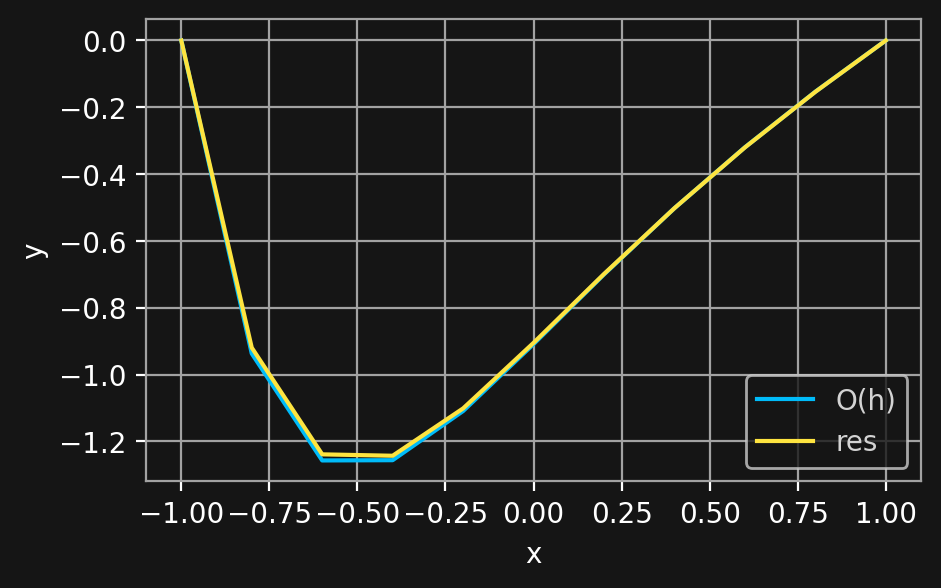

In [10]:
fig, ax = plt.subplots(figsize=(5,3),dpi = 200)
ax.plot(x, oh_result, label=r'O(h)')
ax.plot(x, res.sol(x)[0], label='res')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid()

plt.show()

In [11]:
frame = pd.DataFrame(data)

In [12]:
frame

,x_i,A_i,B_i,C_i,G_i,s_i,t_i,y_i
0,-1.0,0.000000,0.200000,0.000000,0.000,0.000000,0.000000,0.000000
1,-0.8,0.203158,0.553129,0.323158,0.112,0.584236,-0.202485,-0.936731
2,-0.6,0.207778,0.585188,0.347778,0.104,0.749849,-0.314948,-1.256762
3,-0.4,0.214118,0.620985,0.374118,0.096,0.812542,-0.354965,-1.256005
4,-0.2,0.222500,0.661193,0.402500,0.088,0.837838,-0.347583,-1.108915
5,0.0,0.233333,0.706667,0.433333,0.080,0.847727,-0.315164,-0.908686
6,0.2,0.247143,0.758493,0.467143,0.072,0.850924,-0.273033,-0.700134
7,0.4,0.264615,0.818087,0.504615,0.064,0.851069,-0.229793,-0.501926
8,0.6,0.286667,0.887328,0.546667,0.056,0.849713,-0.189435,-0.319754
9,0.8,0.314545,0.968764,0.594545,0.048,0.847546,-0.153368,-0.153368


In [167]:
def richardson(a,b,n,s=1):
    if (s == 1):

        y = oh(n,a,b,p,q,r,f)[0]
        y_2 = oh(2*n, a, b, p, q, r, f)[0]
    if (s==2):
        y = oh_2(n,a,b,p,q,r,f)[0]
        y_2 = oh_2(2*n, a, b, p, q, r, f)[0]
    y_clar=np.array([(2*y_2[2*i] - y[i]) for i in range (n+1)])
    return y_clar

In [15]:
oh_result_2 = oh(20,-1 ,1,p, q, r, f)[0]
richardson_ans = richardson(-1, 1, 20)

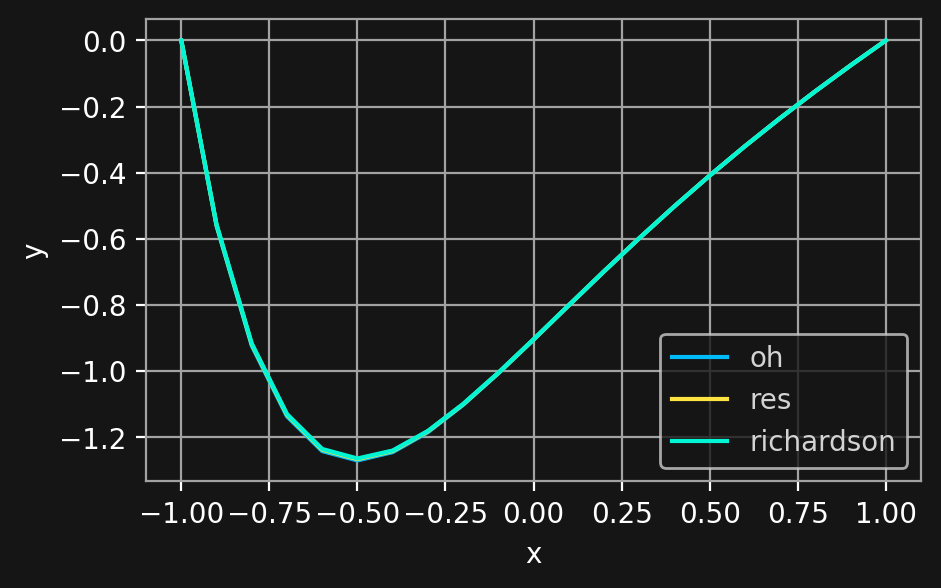

In [16]:
x_richardson = np.linspace(-1, 1, 21)
fig, ax = plt.subplots(figsize=(5,3),dpi = 200)
ax.plot(x_richardson, oh_result_2, label='oh')
ax.plot(x_richardson, res.sol(x_richardson)[0], label='res')
ax.plot(x_richardson, richardson_ans, label='richardson')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid()

plt.show()

In [131]:
def oh_2( n, a, b, p, q, r, f):
     h = (b-a)/(n)
     #x = np.linspace(a-h/2, b-h/2, 2*n+1)
     x = np.linspace(a-h/2, b+h/2, n+2)
     #x = np.linspace(a,b, n+1)
     A = np.array([0])
     B = np.array([h])
     C = np.array([-h])
     G = np.array([0])
     y = np.zeros(n+1)
     s = np.array([C[0]/B[0]])
     t = np.array([-G[0]/B[0]])
     for i in range (1, n+1):
          if (i != n):
               A=np.append(A,-p(x[i]-h/2)-q(x[i])*h/2)
               C=np.append(C,-p(x[i]+h/2) + q(x[i])*h/2)
               B=np.append(B,A[i] + C[i] - h**2*r(x[i]))
               G = np.append (G, h**2*f(x[i]))
          else:
               A = np.append (A, -h)
               B = np.append (B, h)
               C = np.append (C, 0)
               G = np.append (G, 0)
          
          s=np.append(s,C[i]/(B[i]-A[i]*s[i-1]))
          t=np.append(t,(A[i]*t[i-1]-G[i])/(B[i]-A[i]*s[i-1]))
     #y[2*n+2] = t[2*n+2]
     #y[2*n+2] = -y[2*n+1]
     y[n] = t[n]
     for i in range(n-1,-1,-1):
          y[i] = s[i]*y[i+1]+t[i]
     data = {"x_i":np.linspace(a,b,n+1), "A_i":A, "B_i":B, "C_i":C, "G_i":G, "s_i":s, "t_i":t, "y_i":y}
     return y, data






     


In [132]:
oh_2_result, oh_2_data = oh_2(20,-1 ,1,p, q, r, f)

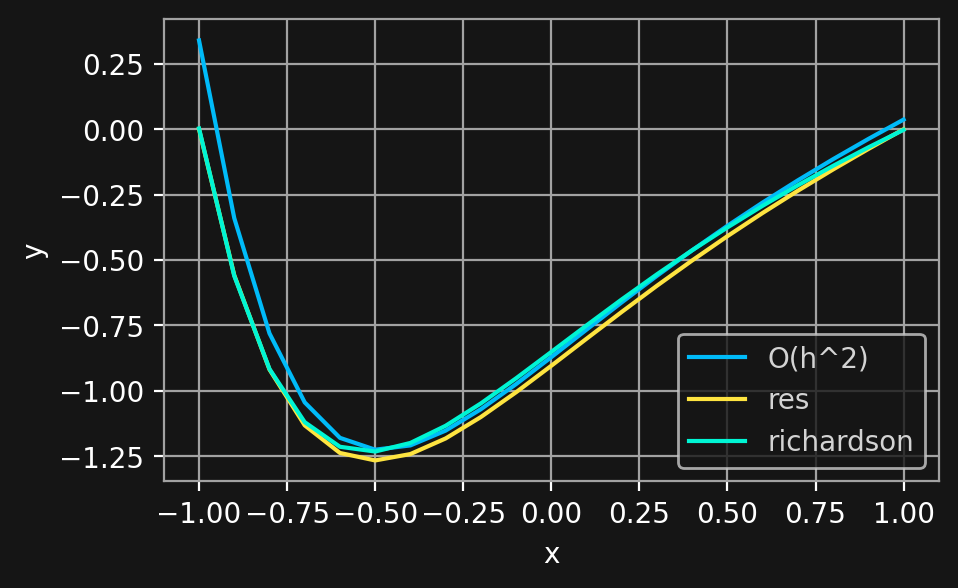

In [172]:
richardson_ans_2 = richardson(-1, 1, 20, 2)
x = oh_2_data['x_i']
fig, ax = plt.subplots(figsize=(5,3),dpi = 200)
ax.plot(x, oh_2_result, label=r'O(h^2)')
ax.plot(x, res.sol(x)[0], label='res')
ax.plot(x, richardson_ans_2, label="richardson")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid()

plt.show()

In [173]:
frame_2=pd.DataFrame(oh_2_data)

In [137]:
frame_2 

,x_i,A_i,B_i,C_i,G_i,s_i,t_i,y_i
0,-1.0,0.000000,0.100000,-0.100000,0.0000,-1.000000,0.000000,0.339886
1,-0.9,0.223750,0.512629,0.282660,0.0295,0.383852,-0.040061,-0.339886
2,-0.8,0.227660,0.526106,0.291908,0.0285,0.665366,-0.085750,-0.781097
3,-0.7,0.231908,0.540301,0.301520,0.0275,0.781146,-0.122763,-1.045059
4,-0.6,0.236520,0.555273,0.311528,0.0265,0.840793,-0.149888,-1.180697
5,-0.5,0.241528,0.571088,0.321964,0.0255,0.874872,-0.167663,-1.225996
6,-0.4,0.246964,0.587817,0.332868,0.0245,0.895395,-0.177285,-1.209700
7,-0.3,0.252868,0.605543,0.344280,0.0235,0.908089,-0.180230,-1.153027
8,-0.2,0.259280,0.624355,0.356250,0.0225,0.916032,-0.178012,-1.071257
9,-0.1,0.266250,0.644358,0.368831,0.0215,0.921007,-0.172040,-0.975123


In [174]:
def create_frame (a, b, n):
    x = np.linspace(a, b, n+1)
    y_ex = res.sol(x)[0]
    y_ut = oh(n, a, b, p ,q, r, f)[0]
    diff = y_ut - y_ex
    y_ut_2 = oh_2(n, a, b, p, q, r, f)[0]
    diff_2 = y_ut_2 - y_ex
    data = {"x":x,"y_ex ":y_ex ,"y_ut":y_ut, "diff":diff, "y_ut_2":y_ut_2, "diff_2":diff_2 }
    frame = pd.DataFrame(data)
    c = frame.columns
    frame.columns = pd.MultiIndex.from_tuples([("",c[0]),("",c[1]),(r"O(h)",c[2]),(r"O(h)",c[3]),
    (r"O(h^2)",c[4]),(r"O(h^2)",c[5])])
    return frame

In [175]:
create_frame(-1, 1 ,10) 

O(h)                  O(h^2)          
      x         y_ex       y_ut          diff    y_ut_2    diff_2
0  -1.0 -5.072855e-21  0.000000  5.072855e-21  0.660668  0.660668
1  -0.8 -9.192861e-01 -0.936731 -1.744456e-02 -0.660668  0.258618
2  -0.6 -1.238534e+00 -1.256762 -1.822762e-02 -1.158883  0.079651
3  -0.4 -1.242730e+00 -1.256005 -1.327492e-02 -1.227124  0.015606
4  -0.2 -1.101060e+00 -1.108915 -7.854942e-03 -1.097260  0.003800
5   0.0 -9.048680e-01 -0.908686 -3.817845e-03 -0.892530  0.012338
6   0.2 -6.987689e-01 -0.700134 -1.364827e-03 -0.671748  0.027021
7   0.4 -5.017931e-01 -0.501926 -1.326378e-04 -0.459336  0.042457
8   0.6 -3.200728e-01 -0.319754  3.189819e-04 -0.263011  0.057062
9   0.8 -1.536691e-01 -0.153368  3.014379e-04 -0.083084  0.070585
10  1.0  7.806256e-18 -0.000000 -7.806256e-18  0.083084  0.083084

In [176]:
create_frame(-1, 1 ,20)

O(h)                  O(h^2)          
      x         y_ex       y_ut          diff    y_ut_2    diff_2
0  -1.0 -5.072855e-21  0.000000  5.072855e-21  0.339886  0.339886
1  -0.9 -5.584254e-01 -0.560870 -2.444671e-03 -0.339886  0.218539
2  -0.8 -9.192861e-01 -0.923538 -4.252036e-03 -0.781097  0.138189
3  -0.7 -1.132936e+00 -1.137585 -4.649148e-03 -1.045059  0.087877
4  -0.6 -1.238534e+00 -1.242980 -4.445901e-03 -1.180697  0.057837
5  -0.5 -1.267186e+00 -1.271101 -3.915936e-03 -1.225996  0.041190
6  -0.4 -1.242730e+00 -1.245977 -3.247697e-03 -1.209700  0.033029
7  -0.3 -1.183007e+00 -1.185569 -2.562254e-03 -1.153027  0.029981
8  -0.2 -1.101060e+00 -1.102990 -1.930292e-03 -1.071257  0.029803
9  -0.1 -1.006191e+00 -1.007578 -1.386945e-03 -0.975123  0.031068
10  0.0 -9.048680e-01 -0.905812 -9.438759e-04 -0.871962  0.032906
11  0.1 -8.014510e-01 -0.802050 -5.985062e-04 -0.766634  0.034817
12  0.2 -6.987689e-01 -0.699110 -3.406468e-04 -0.662233  0.036536
13  0.3 -5.985778e-01 -0.598717 -1.388280e-04 -0.560623  0.037955
14  0.4 -5.017931e-01 -0.501832 -3.940722e-05 -0.462829  0.038965
15  0.5 -4.089425e-01 -0.408897  4.580018e-05 -0.369314  0.039629
16  0.6 -3.200728e-01 -0.319998  7.450515e-05 -0.280177  0.039896
17  0.7 -2.350843e-01 -0.234995  8.896237e-05 -0.195284  0.039800
18  0.8 -1.536691e-01 -0.153596  7.291544e-05 -0.114362  0.039308
19  0.9 -7.545907e-02 -0.075414  4.532401e-05 -0.037051  0.038408
20  1.0  7.806256e-18 -0.000000 -7.806256e-18  0.037051  0.037051